<a href="https://colab.research.google.com/github/Utkarsha1a/NLP/blob/main/BagOfWord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a Bag-of-Words?
**A bag-of-words is a representation of text that describes the occurrence of words within a document.**

Lets take below three types of movie reviews:

Review 1: This movie is very scary and long

Review 2: This movie is not scary and is slow

Review 3: This movie is spooky and good

We will first build a vocabulary from all the unique words in the above three reviews. The vocabulary consists of these 11 words: 

*‘This’, ‘movie’, ‘is’, ‘very’, ‘scary’, ‘and’, ‘long’, ‘not’,  ‘slow’, ‘spooky’,  ‘good’.*

We can now take each of these words and mark their occurrence in the three movie reviews above with 1s and 0s. This will give us 3 vectors for 3 reviews:

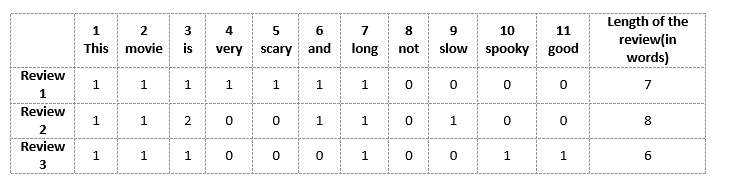

Drawbacks of using a Bag-of-Words (BoW) Model
In the above example, we can have vectors of length 11. However, we start facing issues when we come across new sentences:

1 If the new sentences contain new words, then our vocabulary size would increase and thereby, the length of the vectors would increase too.

2 Additionally, the vectors would also contain many 0s, thereby resulting in a sparse matrix (which is what we would like to avoid)

3 We are retaining no information on the grammar of the sentences nor on the ordering of the words in the text

In [88]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [89]:
paragraph =  """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""
               
               

In [90]:
# Cleaning the texts
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [91]:
print(corpus)

['three vision india', 'year history people world come invaded u captured land conquered mind', 'alexander onwards greek turk mogul portuguese british french dutch came looted u took', 'yet done nation', 'conquered anyone', 'grabbed land culture history tried enforce way life', '', 'respect freedom others first vision freedom', 'believe india got first vision started war independence', 'freedom must protect nurture build', 'free one respect u', 'second vision india development', 'fifty year developing nation', 'time see developed nation', 'among top nation world term gdp', 'percent growth rate area', 'poverty level falling', 'achievement globally recognised today', 'yet lack self confidence see developed nation self reliant self assured', 'incorrect', 'third vision', 'india must stand world', 'believe unless india stand world one respect u', 'strength respect strength', 'must strong military power also economic power', 'must go hand hand', 'good fortune worked three great mind', 'dr vi

In [92]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()

In [99]:
print(corpus[1])

year history people world come invaded u captured land conquered mind


In [100]:
print(X[1])

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0]


In [96]:
for x in range(len(X)):
    print(X[x])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0]
[0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [1]:
def vectorize(tokens):
    ''' This function takes list of words in a sentence as input 
    and returns a vector of size of filtered_vocab.It puts 0 if the 
    word is not present in tokens and count of token if present.'''
    vector=[]
    for w in filtered_vocab:
        vector.append(tokens.count(w))
    return vector
def unique(sequence):
    '''This functions returns a list in which the order remains 
    same and no item repeats.Using the set() function does not 
    preserve the original ordering,so i didnt use that instead'''
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]
#create a list of stopwords.You can import stopwords from nltk too
stopwords=["to","is","a"]
#list of special characters.You can use regular expressions too
special_char=[",",":"," ",";",".","?"]
#Write the sentences in the corpus,in our case, just two 
string1="Welcome to Great Learning , Now start learning"
string2="Learning is a good practice"
#convert them to lower case
string1=string1.lower()
string2=string2.lower()
#split the sentences into tokens
tokens1=string1.split()
tokens2=string2.split()
print(tokens1)
print(tokens2)
#create a vocabulary list
vocab=unique(tokens1+tokens2)
print(vocab)
#filter the vocabulary list
filtered_vocab=[]
for w in vocab: 
    if w not in stopwords and w not in special_char: 
        filtered_vocab.append(w)
print(filtered_vocab)
#convert sentences into vectords
vector1=vectorize(tokens1)
print(vector1)
vector2=vectorize(tokens2)
print(vector2)

['welcome', 'to', 'great', 'learning', ',', 'now', 'start', 'learning']
['learning', 'is', 'a', 'good', 'practice']
['welcome', 'to', 'great', 'learning', ',', 'now', 'start', 'is', 'a', 'good', 'practice']
['welcome', 'great', 'learning', 'now', 'start', 'good', 'practice']
[1, 1, 2, 1, 1, 0, 0]
[0, 0, 1, 0, 0, 1, 1]
